# PyGTFS

In [ ]:
import pygtfs

# db = pygtfs.Schedule("budapest_gtfs.db")
# pygtfs.append_feed(db, 'budapest_gtfs.zip', 'BKK')

db = pygtfs.Schedule("budapest_gtfs.db")

In [3]:
# List all stops
stops = db.stops
for stop in stops:
    print(stop.stop_name, stop.stop_id)

# List all routes
routes = db.routes
for route in routes:
    print(route.route_id, route.route_long_name)

Örs vezér tere M+H, déli tárolótér 002133
Kőbánya alsó vasútállomás 002138
Puskás Ferenc Stadion M 003002
ÉD metró járműtelep,porta 004716
Metró ÉD járműtelep (kapu) 004948
Metró KNY járműtelep (kapu) 004952
Mill.FAV járműtelep (kapu) 005924
Cinkota kocsiszín (kapu) 006390
Csepel kocsiszín (kapu) 007177
Dunaharaszti külső kocsiszín (kapu) 007675
Szentendre kocsiszín (kapu) 007762
Márta utca 007817
Bíróság 007877
Bíróság 007878
Római úti lakótelep, Varsa utca 007879
Bécsi út / Vörösvári út 007880
Váradi utca 007881
Váradi utca 007882
Perényi út 007883
Deák Ferenc tér M 007884
Dorottya utca (Vörösmarty tér M) 007885
Mester utca / Ferenc körút 007887
Mester utca / Ferenc körút 007888
Mester utca / Ferenc körút 007890
Kelenföld vasútállomás M 007897
Maros utcai rendelőintézet 007900
Újpest-városkapu M 007902
526. sor 007913
526. sor 007914
Kele utca 007923
Ültetvény utca 007924
Ferihegy vasútállomás 007927
Ferihegy vasútállomás 007928
Savoyai Jenő tér (Törley tér) 007930
Savoyai Jenő tér (

# Partridge

### Load

In [ ]:
import partridge as ptg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Path to your GTFS zip
gtfs_path = "budapest_gtfs.zip"

# Load GTFS feed
feed = ptg.load_feed(gtfs_path, view=None)  # view=None loads everything


In [3]:
for attr_name in dir(feed):
    df = getattr(feed, attr_name)
    if isinstance(df, pd.DataFrame):
        print(f"{attr_name} ({df.shape[0]} rows):")
        # for col in df.columns:
        #     print(f"  - {col}")
        # print()

agency (2 rows):
calendar (0 rows):
calendar_dates (9212 rows):
fare_attributes (0 rows):
fare_rules (0 rows):
feed_info (1 rows):
frequencies (0 rows):
routes (363 rows):
shapes (631719 rows):
stop_times (5326956 rows):
stops (5539 rows):
transfers (0 rows):
trips (260366 rows):


### Plot map

In [60]:
def plot_stops(stops,ax):
    ax.scatter(stops.stop_lon, stops.stop_lat, s=10, c='red', alpha=0.7)

def plot_shapes(shapes,ax,c='black',alpha=1,lw=0.5):
    for shap_id, group in shapes.groupby("shape_id"):
        group = group.sort_values("shape_pt_sequence")
        ax.plot(group["shape_pt_lon"], group["shape_pt_lat"], linewidth=lw,c=c,alpha=alpha)

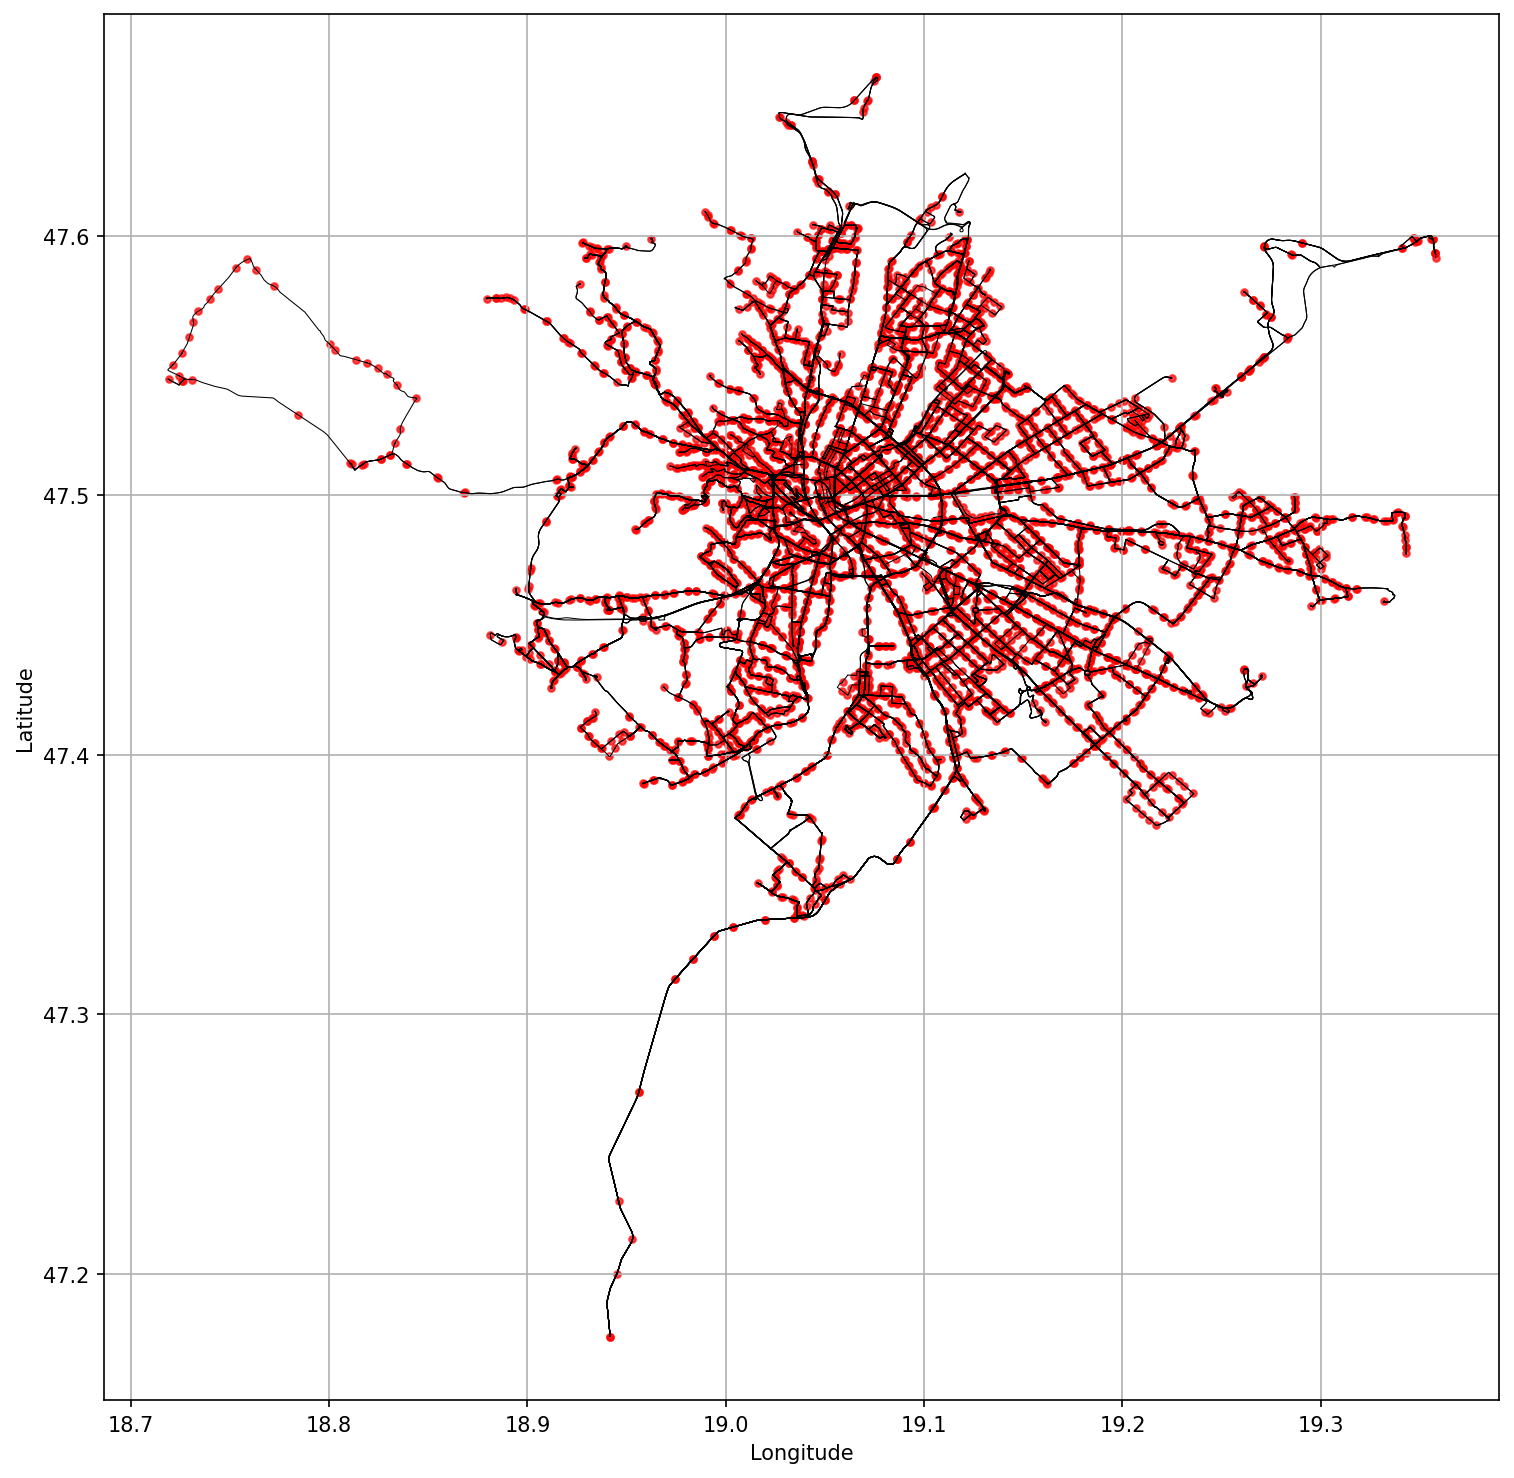

In [61]:
fig, ax = plt.subplots(1,figsize=(12,12),dpi=150)

plot_stops(feed.stops, ax)
plot_shapes(feed.shapes, ax)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

### Check tables

In [39]:
feed.routes.head(n=3)

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
0,BKK,0050,5,NaN,3,"Pasaréti tér / Rákospalota, Kossuth utca",009EE3,FFFFFF,20
1,BKK,0070,7,NaN,3,"Albertfalva vasútállomás / Újpalota, Nyírpalot...",009EE3,FFFFFF,23
2,BKK,0075,7E,NaN,3,"Blaha Lujza tér M / Újpalota, Nyírpalota út",009EE3,FFFFFF,24


In [40]:
feed.trips.head(n=3)

,route_id,trip_id,service_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,8140,C0418310,C04183AHPMAA-011,"Soroksár, Molnár-sziget",0,C04183_8140_1_5,Y701,1.0,1.0
1,8140,C0418311,C04183AHPMAA-011,Csepel-Királyerdő,1,C04183_8140_1_6,Y702,1.0,1.0
2,8140,C0418312,C04183AHPMAA-011,"Soroksár, Molnár-sziget",0,C04183_8140_1_7,Y701,1.0,1.0


In [12]:
trips = feed.trips
routes = feed.routes

print(routes['route_short_name'][0])
trips[trips['route_id'] == routes['route_id'][0]]

5


,route_id,trip_id,service_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
95639,0050,D0166810,D01668AHCKYM-011,Pasaréti tér,1,D01668_0050_12_1,VI96,1.0,2.0
95640,0050,D01668100,D01668AHCKYM-011,Pasaréti tér,1,D01668_0050_31_5,VI96,1.0,2.0
95641,0050,D01668101,D01668AHCKYM-011,"Rákospalota, Kossuth utca",0,D01668_0050_39_3,BHW4,1.0,2.0
95642,0050,D01668104,D01668AHCKYM-011,Pasaréti tér,1,D01668_0050_37_6,VI96,1.0,2.0
95643,0050,D01668105,D01668AHCKYM-011,"Rákospalota, Kossuth utca",0,D01668_0050_38_3,BHW4,1.0,2.0
...,...,...,...,...,...,...,...,...,...
227897,0050,D0473094,D04730RAAPPSIM-031,Pasaréti tér,1,D04730_0050_22_4,VI96,1.0,2.0
227898,0050,D0473096,D04730RAAPPSIM-031,Pasaréti tér,1,D04730_0050_38_5,VI96,1.0,2.0
227899,0050,D0473097,D04730RAAPPSIM-031,"Rákospalota, Kossuth utca",0,D04730_0050_31_5,BHW4,1.0,2.0
227900,0050,D0473098,D04730RAAPPSIM-031,Pasaréti tér,1,D04730_0050_31_6,VI96,1.0,2.0


In [7]:
feed.stops.head(n=3)

,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding
0,007817,Márta utca,47.429184,18.929497,007817,NaN,NaN,NaN,2.0
1,007877,Bíróság,47.519544,18.978060,007877,NaN,NaN,NaN,1.0
2,007878,Bíróság,47.519418,18.978021,007878,NaN,NaN,NaN,1.0


In [41]:
feed.stop_times.head(n=3)

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,C0418310,F04181,28980.0,28980.0,0,NaN,NaN,NaN,0.0
1,C0418310,F04526,29160.0,29160.0,1,NaN,NaN,NaN,160.0
2,C0418311,F04526,30600.0,30600.0,0,NaN,NaN,NaN,0.0


### Route stops

In [43]:
stop_times = feed.stop_times
stops = feed.stops

In [67]:
route_short_name = '5'
route_id = routes[routes['route_short_name'] == route_short_name]['route_id'][0]
route_id

'0050'

In [66]:
# one trip of this route
one_trip_id_of_route = list(trips[trips['route_id'] == route_id]['trip_id'])[0]
one_trip_id_of_route

'D0166810'

In [77]:
stop_times_of_one_trip = stop_times[stop_times['trip_id'] == one_trip_id_of_route]
stop_times_of_one_trip.head(n=3)

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
1938712,D0166810,F03033,19440.0,19440.0,0,NaN,NaN,1,0.0
1938713,D0166810,F03034,19440.0,19440.0,1,NaN,NaN,NaN,316.0
1938714,D0166810,F03036,19500.0,19500.0,2,NaN,NaN,NaN,593.0


In [ ]:
stop_ids_of_one_trip = stop_times_of_one_trip['stop_id'].unique()
stop_ids_of_one_trip

array(['F03033', 'F03034', 'F03036', 'F03038', 'F03058', 'F03071',
       'F03181', 'F03203', 'F03083', 'F03169', 'F03101', 'F03205',
       'F02858', 'F02909', 'F02861', 'F02947', 'F02865', 'F02963',
       'F02881', 'F02875', 'F02730', 'F02722', 'F02717', 'F01145',
       'F01314', 'F01161', 'F01166', 'F01171', 'F01017', 'F01004',
       '062518', 'F00102', 'F00078', 'F00082', 'F00091', 'F00028',
       'F02332', 'F00427', 'F00155', 'F00288', 'F00286', 'F00284',
       'F00282', 'F00280', 'F00276'], dtype=object)

In [89]:
names = stops.set_index('stop_id').loc[stop_ids_of_one_trip, 'stop_name'].to_numpy()
names

array(['Rákospalota, Kossuth utca', 'Kossuth utca, lakótelep',
       'Juhos utca', 'Epres sor', 'Illyés Gyula utca',
       'Rákos úti szakrendelő', 'Wesselényi utca', 'Szent Korona útja',
       'Széchenyi út', 'Opál utca', 'Vág utca', 'Tóth István utca',
       'Öv utca', 'Miskolci utca', 'Rákospatak utca', 'Fűrész utca',
       'Nagy Lajos király útja / Czobor utca', 'Laky Adolf utca',
       'Erzsébet királyné útja, aluljáró', 'Korong utca',
       'Zugló vasútállomás', 'Stefánia út / Thököly út',
       'Cházár András utca', 'Reiner Frigyes park', 'Keleti pályaudvar M',
       'Huszár utca', 'Blaha Lujza tér M', 'Uránia', 'Astoria M',
       'Ferenciek tere M', 'Március 15. tér', 'Szarvas tér',
       'Dózsa György tér', 'Alagút utca', 'Korlát utca', 'Körmöci utca',
       'Széll Kálmán tér M (Csaba utca)', 'Nyúl utca', 'Városmajor',
       'Vasas sportpálya', 'Júlia utca', 'Gábor Áron utca / Pasaréti út',
       'Virág árok', 'Harangvirág utca', 'Pasaréti tér'], dtype=object)

### Dates

In [96]:
stop_times.head(3)

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,C0418310,F04181,28980.0,28980.0,0,NaN,NaN,NaN,0.0
1,C0418310,F04526,29160.0,29160.0,1,NaN,NaN,NaN,160.0
2,C0418311,F04526,30600.0,30600.0,0,NaN,NaN,NaN,0.0


In [117]:
stop_times['arrival_time'].min(), stop_times['arrival_time'].max()

(0.0, 103500.0)

In [127]:
np.arange(len(arrival_times))

array([    0,     1,     2, ..., 31761, 31762, 31763])

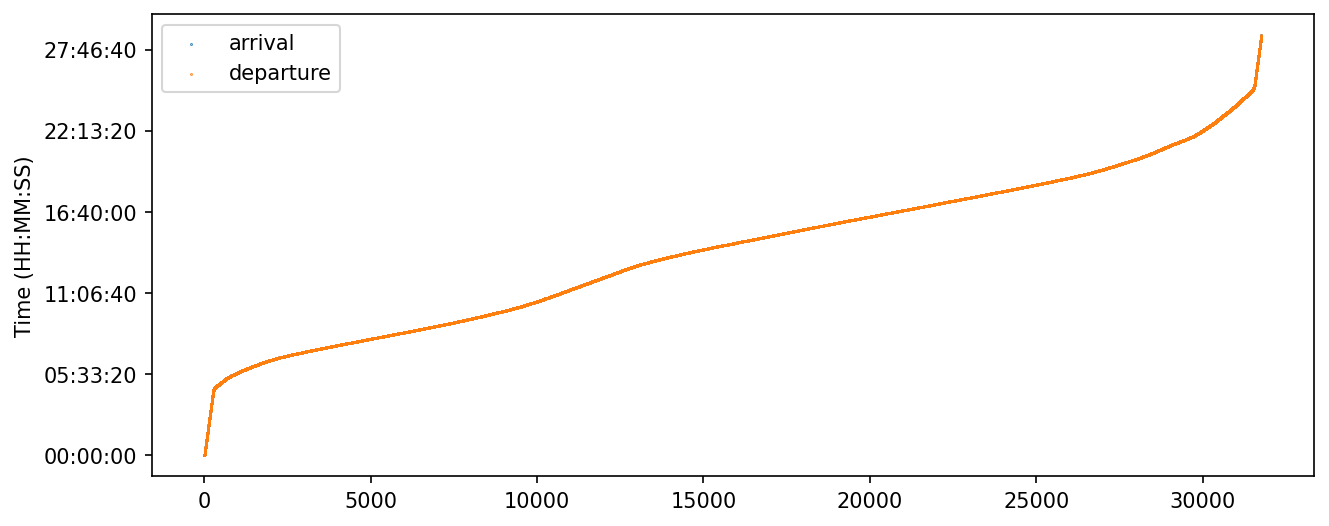

In [133]:
arrival_times = sorted(stop_times['arrival_time'].dropna().unique())
departure_times = sorted(stop_times['departure_time'].dropna().unique())
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def sec_to_hms(sec):
    h = int(sec // 3600)
    m = int((sec % 3600) // 60)
    s = int(sec % 60)
    return f"{h:02d}:{m:02d}:{s:02d}"

fig, ax = plt.subplots(figsize=(10,4), dpi=150)
ax.scatter(np.arange(len(arrival_times)), arrival_times, marker='.', s=0.5, label='arrival')
ax.scatter(np.arange(len(departure_times)), departure_times, marker='.', s=0.5, label='departure')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: sec_to_hms(x)))
ax.set_ylabel('Time (HH:MM:SS)')
ax.legend()
plt.show()


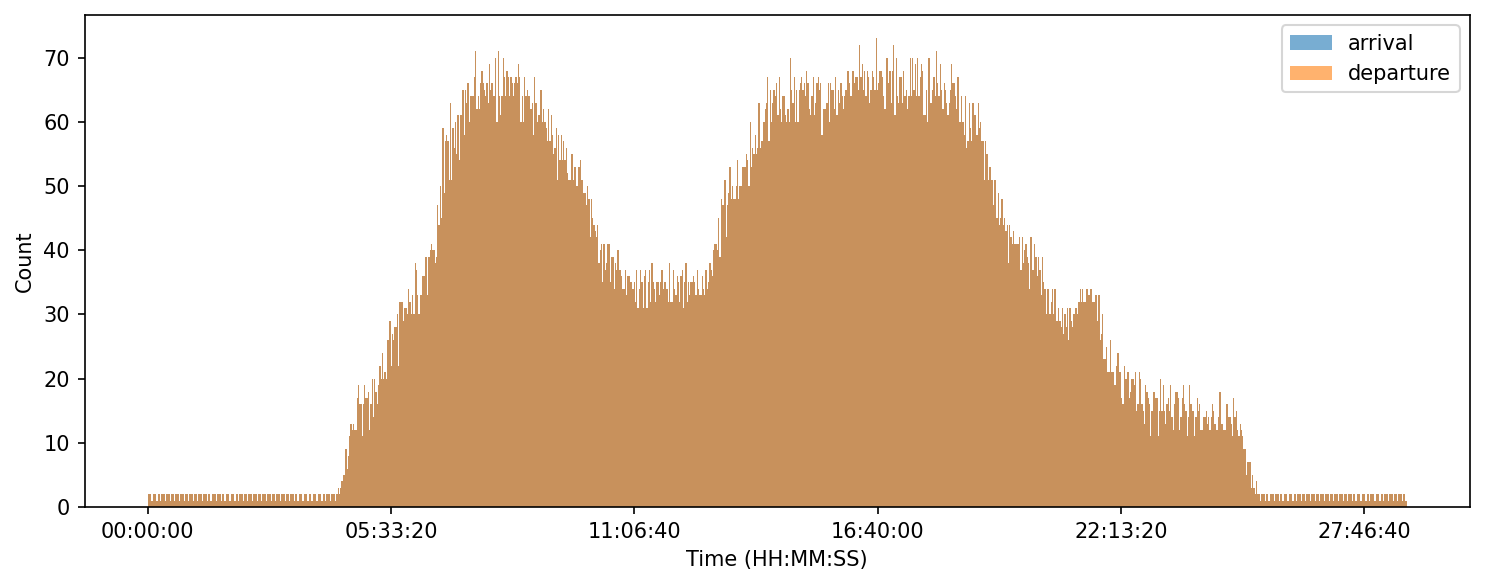

In [135]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def sec_to_hms(sec):
    h = int(sec // 3600)
    m = int((sec % 3600) // 60)
    s = int(sec % 60)
    return f"{h:02d}:{m:02d}:{s:02d}"

fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax.hist(arrival_times, bins=1000, alpha=0.6, label='arrival')
ax.hist(departure_times, bins=1000, alpha=0.6, label='departure')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: sec_to_hms(x)))
ax.set_xlabel('Time (HH:MM:SS)')
ax.set_ylabel('Count')
ax.legend()
plt.tight_layout()
plt.show()


array([ 60.,  60.,  60., ...,  60., 120., 120.])

In [141]:
arrival_diff = np.diff(arrival_times)
departure_diff = np.diff(departure_times)
print("Max gap arrival (sec):", np.max(arrival_diff))
print("Max gap departure (sec):", np.max(departure_diff))
print("Unique arrival time differences (sec):", np.unique(arrival_diff))
print("Unique departure time differences (sec):", np.unique(departure_diff))

Max gap arrival (sec): 120.0
Max gap departure (sec): 120.0
Unique arrival time differences (sec): [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  25.  26.  27.  30.  33.  35.
  37.  40.  43.  48.  50.  52.  55.  60. 120.]
Unique departure time differences (sec): [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  25.  26.  27.  30.  33.  35.
  37.  40.  43.  48.  50.  52.  55.  60. 120.]


### Pick routes

In [ ]:
observed_route_names = ['7','133E','5','9','107','76']
# observed_route_names += ['4','6','2']

In [83]:
routes = feed.routes
observed_routes = routes[routes["route_short_name"].isin(observed_route_names)]
observed_routes

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
0,BKK,0050,5,NaN,3,"Pasaréti tér / Rákospalota, Kossuth utca",009EE3,FFFFFF,20
1,BKK,0070,7,NaN,3,"Albertfalva vasútállomás / Újpalota, Nyírpalot...",009EE3,FFFFFF,23
5,BKK,0090,9,NaN,3,"Óbuda, Bogdáni út / Kőbánya alsó vasútállomás",009EE3,FFFFFF,27
86,BKK,1070,107,NaN,3,BudaPart / Keleti pályaudvar M,009EE3,FFFFFF,152
111,BKK,1335,133E,NaN,3,"Újpalota, Nyírpalota út / Nagytétény, ipartelep",009EE3,FFFFFF,177


In [84]:
trips = feed.trips

observed_trips = trips[trips["route_id"].isin(observed_routes["route_id"])]
observed_trips

,route_id,trip_id,service_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
32964,1070,C954401038,C95440ASZPD-0011,Infopark - BudaPart,1,C95440_1070_2_18,XV90,1.0,2.0
32965,1070,C954401040,C95440ASZPD-0011,Keleti pályaudvar M,0,C95440_1070_2_19,AJM3,1.0,2.0
32966,1070,C954401042,C95440ASZPD-0011,Infopark - BudaPart,1,C95440_1070_4_18,XV90,1.0,2.0
32967,1070,C954401044,C95440ASZPD-0011,Keleti pályaudvar M,0,C95440_1070_4_19,AJM3,1.0,2.0
32968,1070,C954401050,C95440ASZPD-0011,Infopark - BudaPart,1,C95440_1070_3_20,XV90,1.0,2.0
...,...,...,...,...,...,...,...,...,...
258062,0070,D0513191,D05131RAAPPSZB-061,"Újpalota, Nyírpalota út",0,D05131_0070_23_1,BM97,1.0,2.0
258063,0070,D0513193,D05131RAAPPSZB-061,Albertfalva vasútállomás,1,D05131_0070_23_2,SX17,1.0,2.0
258064,0070,D05131931,D05131RAAPPSZB-061,"Újpalota, Nyírpalota út",0,D05131_0075_14_7,BM98,1.0,2.0
258065,0070,D0513196,D05131RAAPPSZB-061,"Újpalota, Nyírpalota út",0,D05131_0070_2_1,BM97,1.0,2.0


In [85]:
shapes = feed.shapes

observed_shapes = shapes[shapes["shape_id"].isin(observed_trips["shape_id"])]
observed_shapes

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
111946,AHS9,436426,47.468522,19.057935,6.0
111947,AHS9,436427,47.468540,19.057710,23.0
111948,AHS9,436428,47.468557,19.057523,37.0
111949,AHS9,436429,47.468594,19.057221,60.0
111950,AHS9,436430,47.468651,19.056842,89.0
...,...,...,...,...,...
613556,Z014,373188,47.500063,19.081118,20214.0
613557,Z014,373189,47.500134,19.081251,20227.0
613558,Z014,373190,47.500186,19.081340,20236.0
613559,Z014,373191,47.500508,19.081902,20291.0


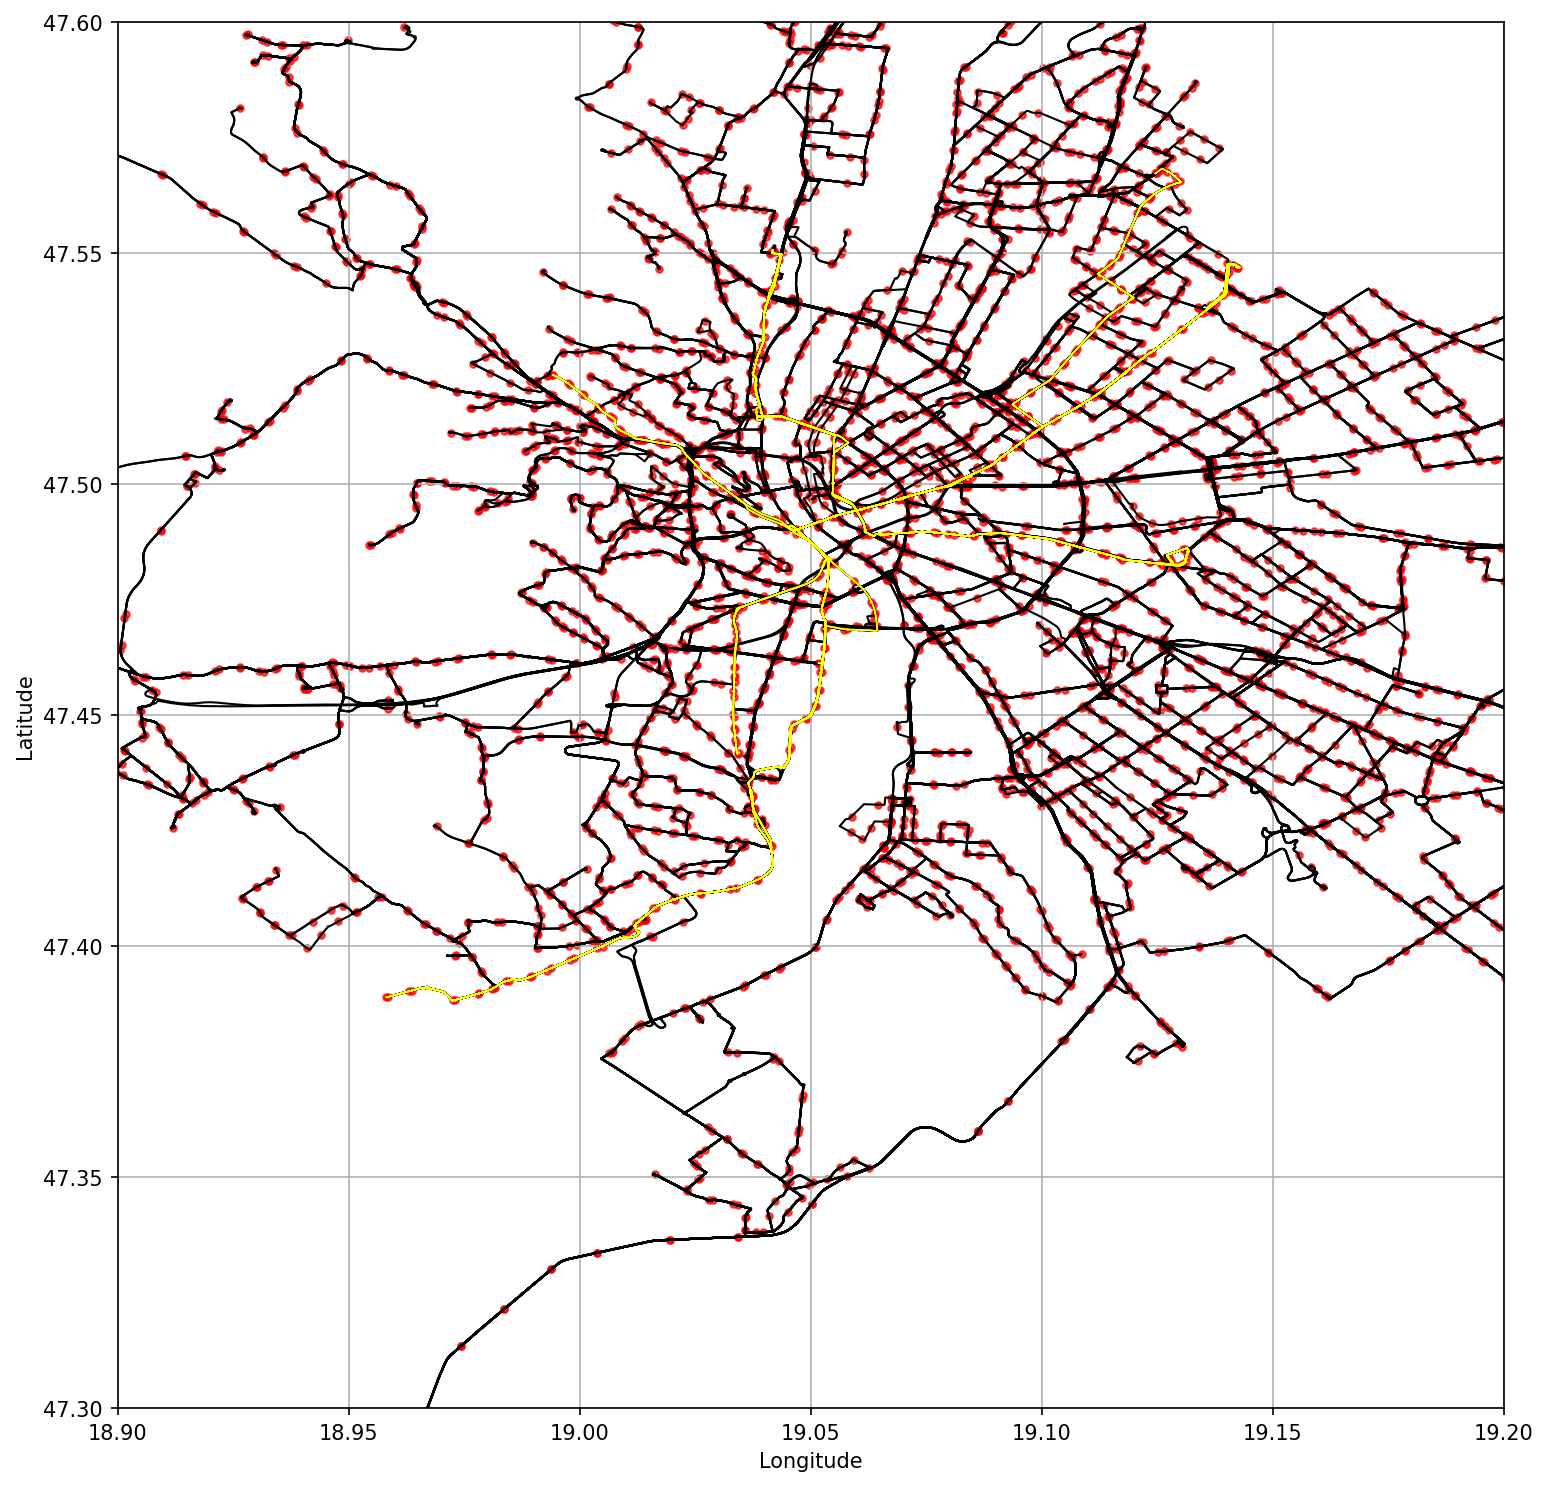

In [86]:
fig, ax = plt.subplots(1,figsize=(12,12),dpi=150)

plot_stops(stops, ax)
plot_shapes(shapes, ax, c='black',alpha=1,lw=1)
plot_shapes(observed_shapes,ax, c='yellow',alpha=1,lw=0.8)

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(18.9,19.2)
ax.set_ylim(47.3,47.6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.show()